X.Shape: (26, 2)


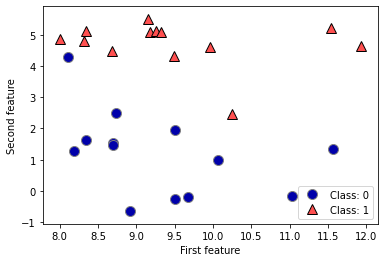

In [71]:

%matplotlib inline
from preamble import *
# データセットの生成
X, y = mglearn.datasets.make_forge()

# プロット
# discrete_scatter 第三引数に各データに対するラベルを指定することにより、そのラベルに応じてMarkerの種類や色を変えて散布図を描写する
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# legend 凡例を表示する
plt.legend(["Class: 0", "Class: 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.Shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

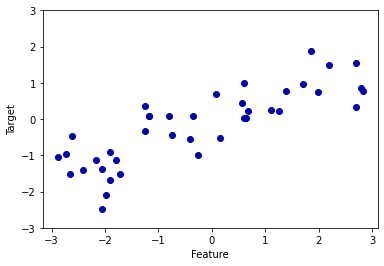

In [72]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [73]:

# 癌のデータによるサンプル

from sklearn.datasets import load_breast_cancer
# Bunch型の変数
cancer = load_breast_cancer()
print("cancer.keys(): \n {}".format(cancer.keys()))

cancer.keys(): 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [74]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [75]:
# np.bincount 値の出現回数
print("Sample of count per class: {}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample of count per class: {'malignant': 212, 'benign': 357}


In [76]:
print("Feature names: \n {}".format(cancer.feature_names))

Feature names: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [77]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data Shape: {}".format(boston.data.shape))

Data Shape: (506, 13)


In [78]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


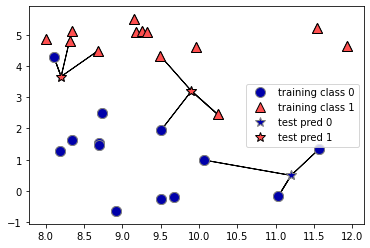

In [79]:
# k-最近傍法
# 訓練データに含まれる点の中で予測したいデータポイントにもっとも近い物だけをみる
# k個の近傍点を用いて予測を行う、k > 1の時は投票でラベルを決定する
# アルゴリズムとしては、もっとも単純なもの
mglearn.plots.plot_knn_classification(n_neighbors=1)

mglearn.plots.plot_knn_classification(n_neighbors=3)

In [80]:
# 訓練データを用いてk-最近傍法を実践する

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

# データを訓練/テストに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [81]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)


In [82]:
# モデルの適用
clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [83]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [84]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


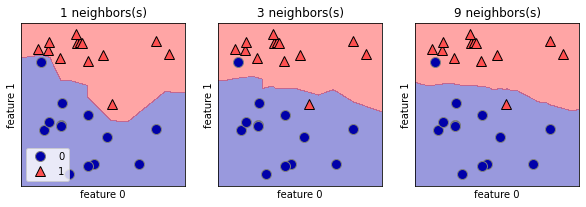

In [85]:
# subplot 現在の図に軸を追加するか、既存の軸を取得する
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{} neighbors(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

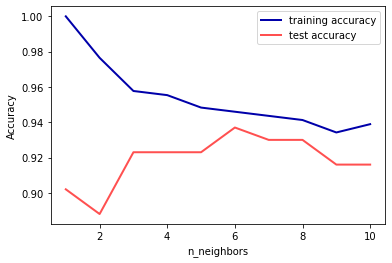

In [86]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# n_neighborsを1〜10まで検証する
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # モデルの構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 訓練データの精度を保存
    training_accuracy.append(clf.score(X_train, y_train))
    # 汎化精度を保存
    test_accuracy.append(clf.score(X_test, y_test))

# それぞれを可視化することで最適解を検討する
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

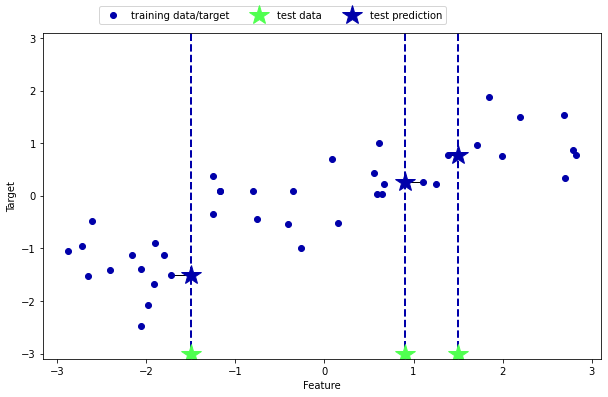

In [87]:
# k-最近傍法 回帰パターン
mglearn.plots.plot_knn_regression(n_neighbors=1)

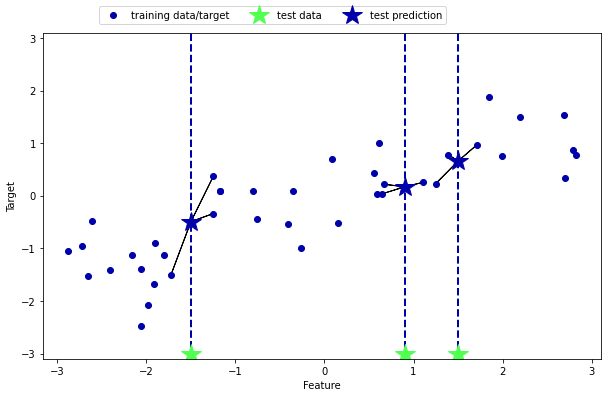

In [88]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [89]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

#  waveのデータセットを訓練データセットとテストセットに分類する
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 3つの最近傍点を考慮するようにインスタンスを生成する
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [90]:
print("Test set predictions: \n {}".format(reg.predict(X_test)))

Test set predictions: 
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [91]:
# R^2 スコアで予測の正確さを計測する
# 決定係数とも呼ばれる
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))



Test set R^2: 0.83


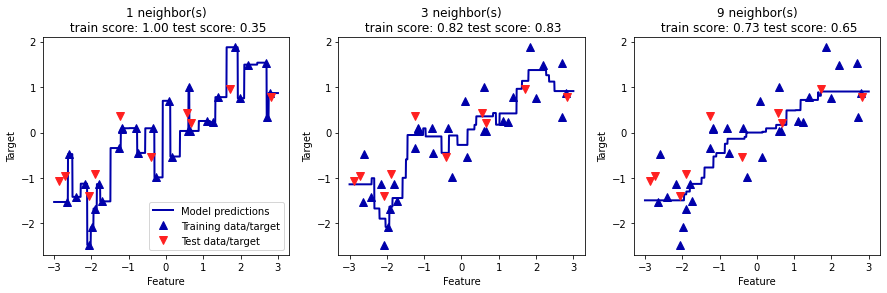

In [92]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3から3まで1000個のデータポイントを生成する
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1,3,9の近傍点を用いる
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

In [93]:
# k-最近傍法まとめ
# 重要なパラメータは「近傍点」と「データポイント間の距離測度」、実用的な近傍点は3から5であることがほとんどである
# メリットとして理解しやすいアルゴリズムであることと、パラメータを細かく調整しなくても精度が高いことが多い
# デメリットとしてデータ数が多い場合に予測が遅くなる。特徴量が多い場合に機能しないことが多い。
# 特徴量がほとんど0になるような「疎なデータセット」な場合も同様に性能が悪くなる

In [94]:
# 線形モデル

w[0]: 0.393906  b: -0.031804


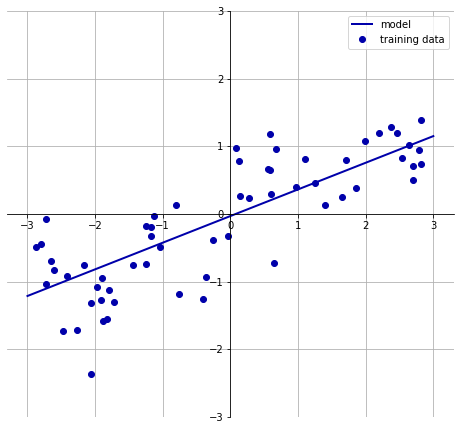

In [95]:
# 1次元の特徴量では制約が強すぎることがわかる
mglearn.plots.plot_linear_regression_wave()

In [96]:
# 通常最小二乗法
# もっともシンプルで古典的な線形回帰手法
# 予測値とターゲットの平均二乗誤差が最小値になるようにパラメータを学習する

from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
# データを訓練/テストに分離
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 線形回帰モデルに適合させる
lr = LinearRegression().fit(X_train, y_train)

In [97]:
# scikit-learnでは訓練データから得られた属性に[_]を付与してパラメータと区別する
# coef_ :[傾き]を表す値は、重みや係数(coefficient)
print("lr.coef_: {}".format(lr.coef_))

# intercept_ : 切片
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


In [98]:
# 性能の確認
# シンプルなデータでは適合不足が発生しやすい
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [99]:
# 特徴量が多いデータを確認する
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [100]:
# 特徴量が多い場合に過剰適合が発生しやすいことがわかる
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [101]:
# 標準的な線形回帰の代表例としてリッジ回帰(ridge regression)
# 正則化を用いて過剰適合を防ぐ
# リッジ回帰ではL2正則化を用いている

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
# 訓練データの結果は、線形回帰より低いがテストデータの精度は高い
# 線形回帰より汎化性能が高い
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [102]:
# alphaで正則化度合いを調整する
# alphaが大きいほど訓練セットの性能は低下する
# defaultはalpha=1
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [103]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


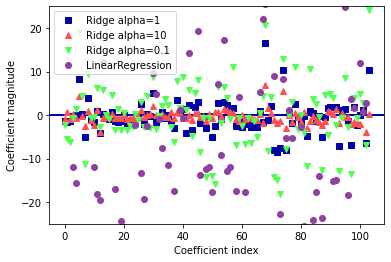

In [104]:
# 最適化するには、さまざまなalphaを検討する必要がある

# 各alphaのリッジ回帰と線形回帰をプロットする
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
# hlines 水平線を描画
# vlines 垂直線を描画
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

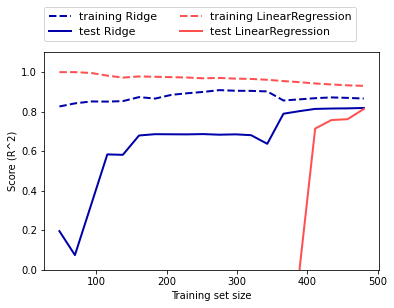

In [105]:
# alphaを固定して訓練データ量を変化させる
mglearn.plots.plot_ridge_n_samples()

In [106]:
# Lasso回帰
# L1正則化をかけて、いくつかの特徴量の係数を0にしている
# これにより因果関係の低い特徴量がわかる

from sklearn.linear_model import Lasso

# Lasso回帰のインスタンスを生成して適合させる
# 利用している特徴量の数がわかる
# デフォルトの値では適合不足がわかる
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [107]:
# max_iter: 最大繰り返し回数
# 警告が出るため最大繰り返し回数をデフォルト値から増やす
# alphaを小さくして重み係数を0から遠ざける
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [108]:
# 注意としてalphaを小さくしすぎると正則化の効果が薄れる
# 結果から過剰適合気味であることがわかる
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

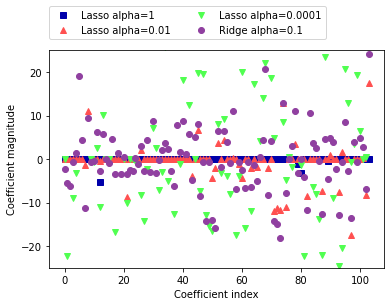

In [109]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In [110]:
# クラス分類のための線形モデル
# 2クラス分類
# 分類では重みとパラメータ積の和を返すのではなく、閾値を超えるかを判定している
# アルゴリズムの区別
## 係数と切片の特定の組み合わせと訓練データの適合度を測る尺度
## 正則化を行うか？行う場合はL1 or L2

/Users/mitsunagajunichi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


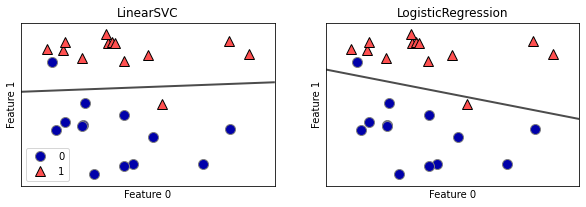

In [111]:
# 一般的なクラス分類アルゴリズム
## ロジスティック回帰
## サポートベクタマシン

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
# サポートベクタとロジスティック回帰を軸別に適合させる
# デフォルトではL2正則化を行っている
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    # plot_2d_separator: 指定された値とXに渡されたデータから、分類結果の境界線（決定境界）を作成する
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    # discrete_scatter: マーカなどの色を自動的に変更する
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

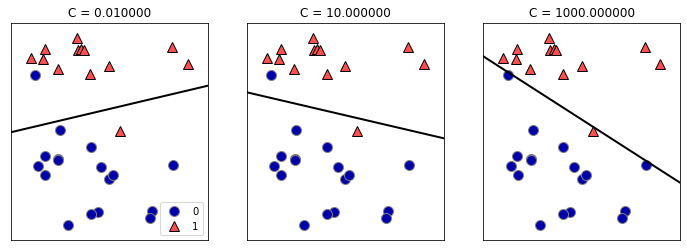

In [112]:
# 正則化パラメータ毎の適合グラフ
# C: 正則化パラメータ
# 大きいほど重み係数は0から離れる
# 小さいほど重み係数は0に近づく
mglearn.plots.plot_linear_svc_regularization()

In [113]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


In [114]:
# Cを大きくして、重み係数が0から離れるように調整する
# 訓練データの精度が上がるがテストデータの精度が下がる
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.984
Test set score: 0.965


In [115]:
# Cを小さくして、重み係数が0に近づけるように調整する
# C=1 のとき、訓練データとテストデータの結果が近いと適合不足の可能性がある
# C=0.01にするとより適合不足に進む
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


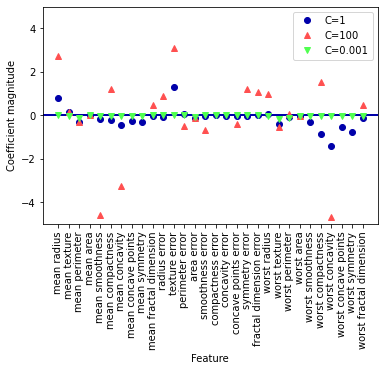

In [116]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Number of features used with C=0.001: : 3
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Number of features used with C=1.000: : 10
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98
Number of features used with C=100.000: : 23


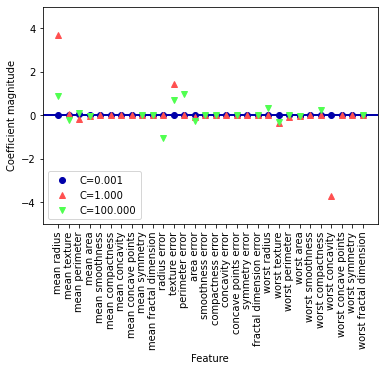

In [117]:
# 正則化パラメータの調整
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    # L1正則化のロジスティック回帰
    # 正則化パラメータが小さいと重み係数は0に近づきやすいため選択する特徴量が減少する
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1", max_iter=5000).fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    # 特徴量の数
    print("Number of features used with C={:.3f}: : {}".format(
        C, np.sum(lr_l1.coef_ != 0)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

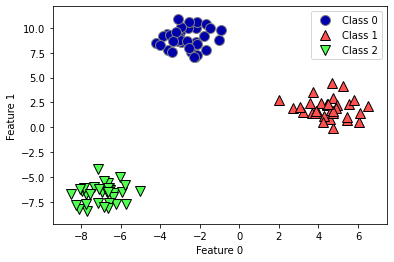

In [118]:
# 線形モデルによる多クラス分類
# 各クラスに対して、自分のクラスか？そうでないか？の分類を行う
# もっとも高いスコアを示したクラスを予測結果とする
# 回帰モデルではalpha, LinearSVC, LogisticRegressionではCという正則化パラメータが重要になる
# 正則化については、特徴量を選定したい場合はL1正則化、それ以外の場合ではL2正則化を利用すると良さそう
from sklearn.datasets import make_blobs

# ガウス分布のサンプリングデータ
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [119]:
# LinearSVCクラス分類をデータセットで学習させる
linear_svm = LinearSVC().fit(X, y)
# 重み係数
print("Coefficient shape: ", linear_svm.coef_.shape)

# 切片
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


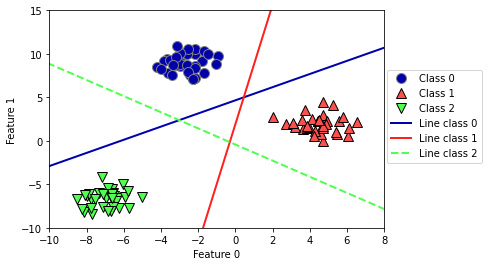

In [120]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# linspace: 線形に等間隔な数列を生成する関数
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

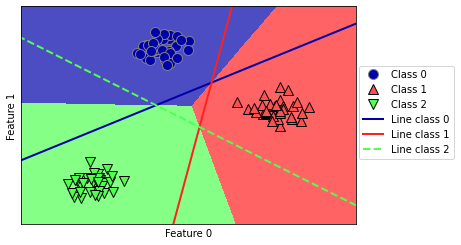

In [121]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [122]:
# ナイーブベイズクラス分類
# 訓練が線形モデルよりも高速に行える
# クラスに対する統計値を特徴量ごとに集めて学習しているからである
# 汎化性能がロジスティック回帰等と比べると劣ることが多い
# scikit-learnでは3種類のアルゴリズムに対応している
# GaussianNB : 任意の連続データに適用できる
# BernoulliNB : 2値のデータを仮定している
# MultinomialNB : カウントデータを仮定している

In [123]:
# 2値データサンプル
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [124]:
counts = {}
for label in np.unique(y):
    # クラスに対してloop
    # 0でない数をカウントする
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n", counts)

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [125]:
# 決定木
# クラス分類と回帰タスクに用いられる
# Yes/Noで回答できる質問で構成された階層的な木構造を学習する
# 機械学習では質問のことを「テスト」と表現する
# 葉が純粋な物になるまで分岐する場合は過剰結合になりやすい
# それを防ぐために「事前枝刈り」や「事後枝刈り」または「枝刈り」で調整することがある
# 具体的には葉の最大値を制限したり、木の深さを制御するなどがあげられる
# scikit-learnではDecisionTreeRegressorとDecisionTreeClassifierが実装されている
# scikit-learnでは「事前枝刈り」が実装されている

In [126]:
from sklearn.tree import DecisionTreeClassifier
# 事前枝刈りをcancerデータで検証する
# 事前枝刈りしていない場合は、過剰適合していることがわかる
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [127]:
# 木の深さを制御する
# max_depth: 木の深さ
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [128]:
# 決定木の分析
# export_graphviz関数で木を可視化する

from sklearn.tree import export_graphviz
# fileの読み込み
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [129]:
import graphviz

# 可視化することで予測過程を確認できる
# 決定木を検証する方法として、大多数のデータがたどるパスを見つけるというのがある
# それによりクラス別のデータがどのような工程で予測されるか検討がつく
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ModuleNotFoundError: No module named 'graphviz'

In [60]:
# 特徴量の重要性を確認できる
# 0~1であり1に近づくほど重要度が高くなる
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.048
 0.    0.    0.002 0.    0.    0.    0.    0.    0.727 0.046 0.    0.
 0.014 0.    0.018 0.122 0.012 0.   ]


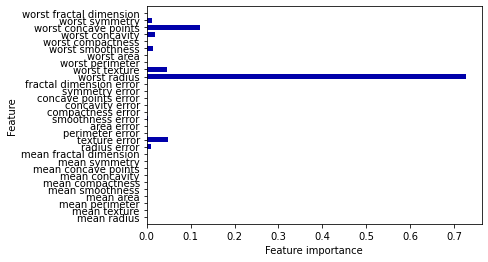

In [61]:
# 重要度を可視化する
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    # barh: 横棒グラフ
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

In [63]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

ModuleNotFoundError: No module named 'graphviz'

Text(0, 0.5, 'Price in $/Mbyte')

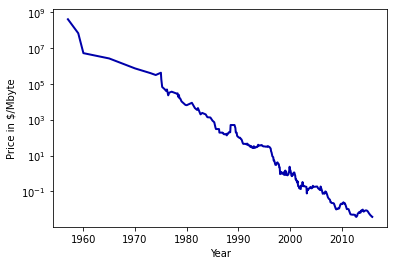

In [63]:
# 決定木の回帰
# 考え方の大半は分類時と同様になる
# 注意点として外挿できない　→　訓練データのレンジ外に対して予測できない

import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [65]:
# RAM価格のサンプルデータを2つのモデルで予測する
# 決定木回帰/線形回帰

from sklearn.tree import DecisionTreeRegressor
# 2000年以前のデータで、2000年以降を予測する
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 日付に基づいて価格を予測する
# newaxis: NumPy配列に次元を追加する
# 日付データが2次元になる 
# こんな感じ[[],[]]
X_train = data_train.date[:, np.newaxis]
# データのターゲットの関係を単純にするため対数変換する
y_train = np.log(data_train.price)

# 回帰モデルのインスタンスを生成し、適合させる
tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 全ての価格を予測する
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 対数変換を戻すため逆関数変換
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

<ipython-input-65-11446bf18d10>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
<ipython-input-65-11446bf18d10>:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


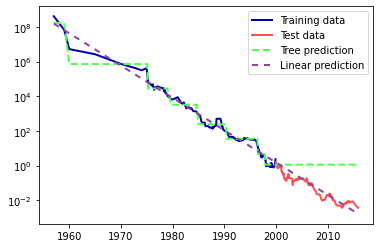

In [66]:
# 結果の可視化
# semilogy: 対数軸のプロット
# legend: 凡例
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

# 決定木が訓練データのレンジ外では予測できていないことがわかる

In [ ]:
# 決定木のメリット
# 他のアルゴリズムと比較して結果モデルの可視化が容易であり、専門的な知識がなくても理解しやすい
# データのスケールに対して不変であることもポイントになる
# これによって特徴量の標準化や正規化が必要ない
# 決定木のデメリット
# 過剰適合しやすいことと訓練データのレンジ外に対応できないことである
# これを解決するためにアンサンブル法を用いる

In [ ]:
# 決定木のアンサンブル法
# 複数の機械学習を組み合わせること
# さまざまなデータセットのクラス分類や回帰に有効な方法が文献から判明している

In [ ]:
# ランダムフォレスト
# 少しずつ異なる決定木をたくさん集めて予測する
# 個々の決定木の精度は高いが一部のデータに過剰適合するため、複数組み合わせて平均をとることで解決を狙っている

In [ ]:
# ランダムフォレストの構築
# 構築する決定木の数を決定する必要がある
# n_estimators で決定する
# 構築の工程としてブートストラップサンプリングを行う
# ブートストラップサンプリング: データセットから重複ありでデータを抽出すること→復元抽出
# そこから得られたデータで決定木を作成する
# 決定木を構築する際に、max_featuresを調整してそれぞれの決定木で利用する特徴量を変更する
# max_featuresの設定がミソになる

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

# n_estimators: 決定木の数
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

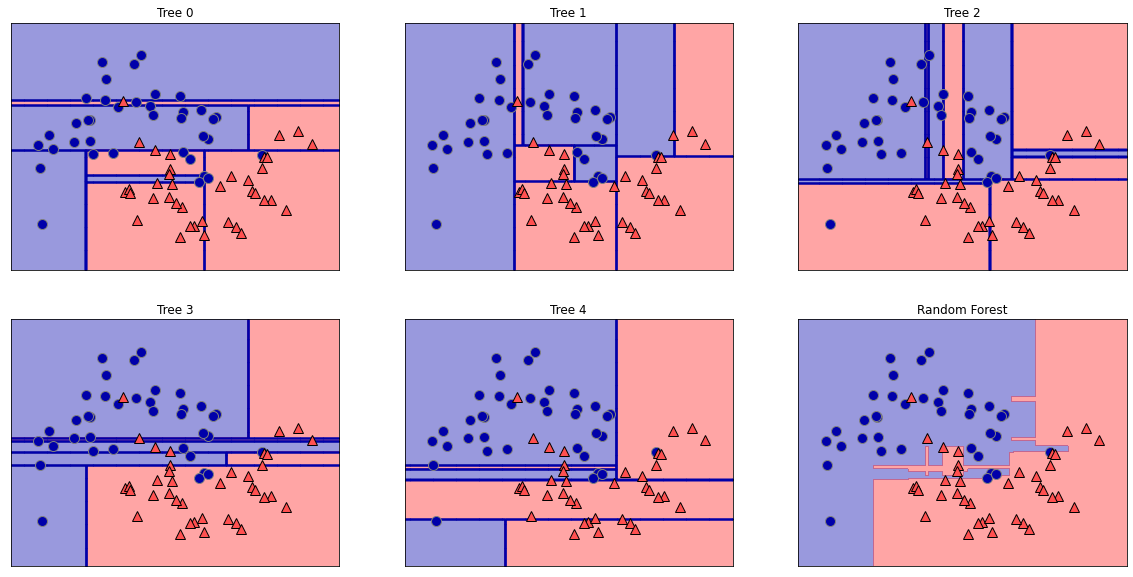

In [68]:
# 各決定木の分類結果を可視化
# ランダムフォレストは各決定木の平均を決定境界としている
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
# 決定木の数を増やす
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [70]:
# 特徴量の重要度
plot_feature_importances_cancer(forest)


NameError: name 'plot_feature_importances_cancer' is not defined

In [ ]:
# ランダムフォレストのまとめ
# n_jobsパラメータで並列計算のコア数を指定できる
# 基本ランダムなため乱数シードを変更するとモデルが大きく変わる可能性がある
# しかし、決定木の数を増やすことで乱数シードの影響を受けにくくなる
# 苦手分野
# テキストデータなどの高次元で疎なデータに対してうまく機能しない側面があるため、その場合は線形モデルの方が良い
# 訓練も予測も速度が遅く、メモリを消費するためアプリケーションの要件によっては線形モデルを使った方が良い
# 性能に関しては各パラメータを調整して制限することで向上が見込る

In [ ]:
# 勾配ブースティング回帰木(勾配ブースティングマシン)
# ランダムフォレストと同様に複数の決定木を組み合わせて回帰や分類を行う
# 異なる点として1つ前の決定木の謝りを次の決定木で修正する動きで決定木を作る
# 浅い決定木(計算が早い)を多数組み合わせることで徐々に精度をあげる
# 乱数性がなく深さも浅いのでランダムフォレストと比較するとパラメータの影響を受けやすい
# 決定木の修正度合いを設定するのにlearning_rate(学習率)を用いる
# 学習率を大きくしたり、決定木数を増やすとモデルは複雑になる

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
# 勾配ブースティングマシンインスタンスの生成
# デフォルトの深さは3
# デフォルトの学習率は0.1
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [131]:
# 前の結果が過剰適合気味なので深さを制限する
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [132]:
# あるいは学習率を調整する
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


In [133]:
# パラメータの重要度を確認する
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

NameError: name 'plot_feature_importances_cancer' is not defined

In [ ]:
# 勾配ブースティング回帰
# 教師あり学習の中では強力なアルゴリズム
# 弱点としてパラメータのチューニングに細心の注意が必要なことと訓練の時間がかかることである
# テキストデータのような疎なデータへの性能はあまりよくない → この辺は決定木アルゴリズムの共通のようだ
# 重要なパラメータとして
# n_estimators: 決定木の数
# learning_rate: 学習率
# max_depth: 木の深さ
# ランダムフォレストは決定木数が増えても平均をとるので、値が収束するが、勾配ブースティングは修正しながらなのでモデルが複雑になる


In [ ]:
# カーネル法を用いたサポートベクタマシン
# カーネル法を用いることでより複雑なモデルを可能にした物らしい

Text(0, 0.5, 'Feature 1')

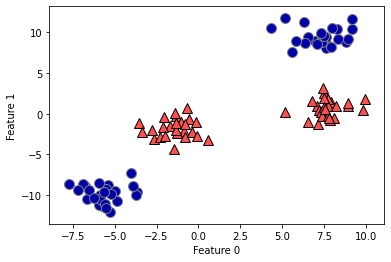

In [134]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/Users/mitsunagajunichi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, 'Feature 1')

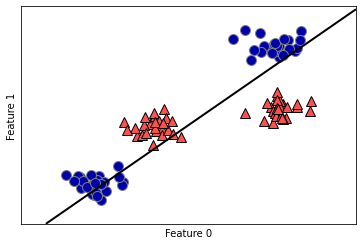

In [135]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
# 線形サポートベクタマシンだと、直線になるので柔軟性がなく適切な予測ができない

Text(0.5, 0, 'feature1 ** 2')

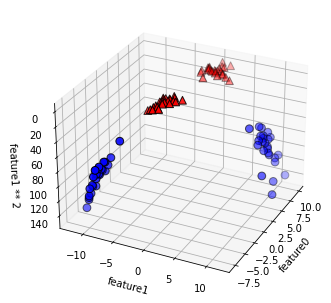

In [136]:
# 2番目の特徴量の2乗を追加する
# これは3次元になるように操作している
# hstack: 配列の水平連結
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3D化
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0をプロットしてからy == 1をプロット
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

/Users/mitsunagajunichi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, 'feature1 ** 2')

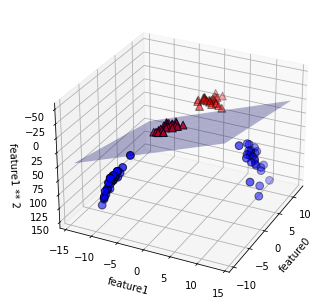

In [137]:
# 3次元のデータで線形モデルを適用する
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 線形決定境界を描画
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0, 0.5, 'Feature 1')

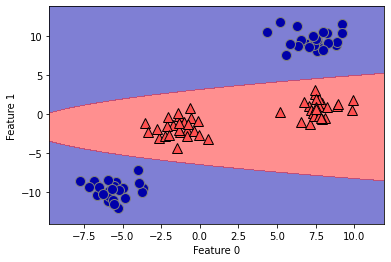

In [138]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
# 線形SVCモデルは線形ではなくなり、直線ではなく楕円に近くなっている

In [ ]:
# カーネルトリック
# 非線形の特徴量をデータ表現に加えると、線形モデルが強力になる
# しかし、実際に何を加えれば良いかわからず、パターンも膨大になる、これをうまく学習させる数学的なトリックがカーネルトリック
# 拡張された特徴表現上でデータポイント間の距離を実際のデータポイントの拡張を使わずに計算する方法
# よく用いられるのは多項式カーネルと放射基底関数カーネルがある。

In [ ]:
# SVMの理解
# 個々のデータポイントが2つのクラスの決定境界を表現するのにどれほど重要かを学習する。
# 多くの場合は、境界に位置する一部のデータポイントが重要になる、これらのことをサポートベクタと呼ぶ

Text(0, 0.5, 'Feature 1')

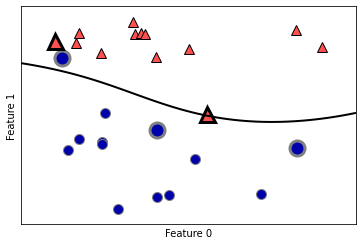

In [139]:
from sklearn.svm import SVC

# サポートベクタマシンの例
X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 決定境界を決めるのに重要なデータポイント(サポートベクタ)をプロットする
sv = svm.support_vectors_
# duak_coef_: サポートベクタの重要性
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

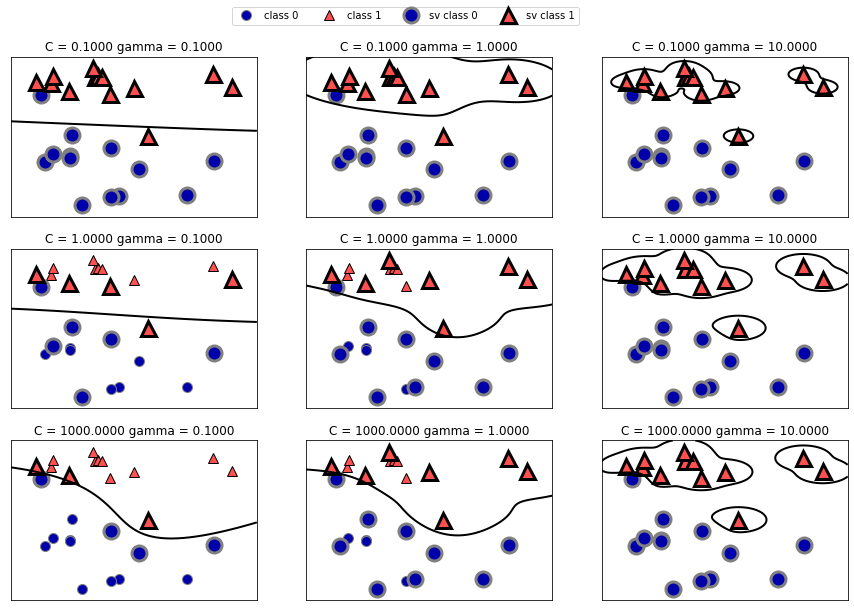

In [140]:
# 正則化パラメータC, ガウシアンカーネルの幅を調整するgammaをチューニングする
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

In [141]:
# ガウシアンカーネルをcancerに適合させる
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


Text(0, 0.5, 'Feature magnitude')

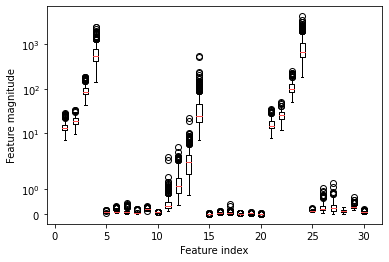

In [142]:
# 各データの桁が異なることからモデルの適合への影響が大きい
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

In [143]:
# カーネル法を用いたSVMでよく用いられるのは特徴量を0~1の範囲にする方法
# 訓練データの特徴量の最小値を計算
#  axis=0 列ごとの計算
#  axis=1 行ごとの計算
min_on_training = X_train.min(axis=0)
# 訓練データの特徴量のレンジを計算
range_on_training = (X_train - min_on_training).max(axis=0)

# 個々の特徴量は最小0 最大1となる
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

Minimum for each feature
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [144]:
# テストデータも同様の処理を実施する
X_test_scaled = (X_test - min_on_training) / range_on_training

In [145]:
# データをスケールすると結果が変化する
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


In [146]:
# パラメータを調整して精度をあげる
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


In [ ]:
# サポートベクタ
# カーネル法を用いたサポートベクタはさまざまなデータに機能する強力な方法
# SVMは10000サンプルくらいまでは上手く機能するがそれ以上はメモリや実行時間の関係で難しくなる
# 弱点としてデータの前処理とパラメータ調整に注意することだ
# さらに予測された理由を理解するのが難しい、決定木の場合は可視化等を行えば専門家でなくとも説明しやすい
